## assignment 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time


In [2]:
rng = np.random.default_rng(12345)

## Programming tasks

### Exercise 1
1. Write Python code for generating a sample path of a Brownian motion with drift: $X_t = X_0 + \mu t + \sigma W_t$, where $(W_t)$ is a standard Brownian motion and $X_0, \mu, \sigma$ are constants.  
2. Plot some realisations of sample paths using parameters of your choice.  

### Exercise 1 - Solutions 


In [3]:
def generate_bm_exact(rng, s0, mu, sigma, T, numberofsteps):
    h = T / numberofsteps
    mynormals = rng.standard_normal(size=numberofsteps)
    # Generate Brownian motion paths without looping in time
    rv = np.cumsum(mynormals)
    timepoints = np.arange(1, numberofsteps+1) * h
    samplepath = s0 + mu * timepoints + np.sqrt(h) * sigma * rv
    samplepath = np.insert(samplepath, 0, s0)
    return samplepath

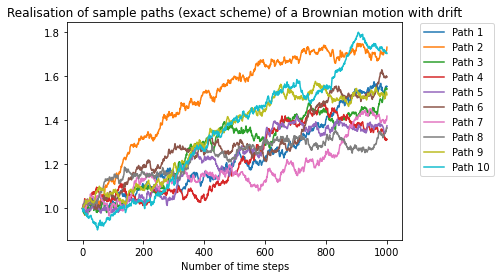

In [4]:
P = 10  # number of sample paths

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
for i in range(P):
    path = generate_bm_exact(rng, s0=1, mu=0.5, sigma=0.2, T=1, numberofsteps=1000)
    ax.plot(path, label = "Path {}".format(i+1))
    ax.set_xlabel("Number of time steps")
    ax.set_title("Realisation of sample paths (exact scheme) of a Brownian motion with drift")
    #ax.legend(loc = "upper left")
    ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.1)
plt.show()

### Exercise 2 
1. Write Python code for generating a sample path of a Geometric Brownian motion $X_t =X_0\exp((\mu - \frac{\sigma^2}{2}) t + \sigma W_t)$ 
	using an exact sampling scheme. 
2. Write Python code for generating a sample path of a Geometric Brownian motion	using the first order Euler scheme.
3. Plot some realisations of sample paths for parameters of your choice.  

### Exercise 2 - Solutions 

1. Exact simulation scheme for a sample path of a geometric Brownian motion:  

In [5]:
def generate_gbm_exact(rng, s0, mu, sigma, T, numberofsteps):
    h = T / numberofsteps
    mynormals = rng.standard_normal(size=numberofsteps)
    rv = np.cumsum(mynormals)
    timepoints = np.arange(1, numberofsteps+1) * h
    tmp1 = (mu - 0.5 * sigma ** 2) * timepoints
    tmp2 = np.sqrt(h) * sigma * rv
    samplepath = s0 * np.exp(tmp1 + tmp2)
    samplepath = np.insert(samplepath, 0, s0)
    return samplepath

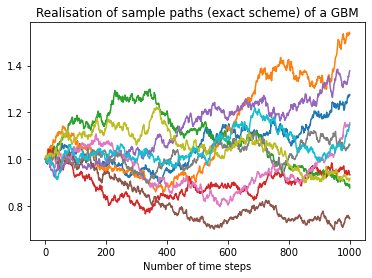

In [6]:
P = 10  # number of sample paths

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
for _ in range(P):
    path = generate_gbm_exact(rng, s0=1, mu=0, sigma=0.2, T=1, numberofsteps=1000)
    ax.plot(path)
    ax.set_xlabel("Number of time steps")
    ax.set_title("Realisation of sample paths (exact scheme) of a GBM")
plt.show()

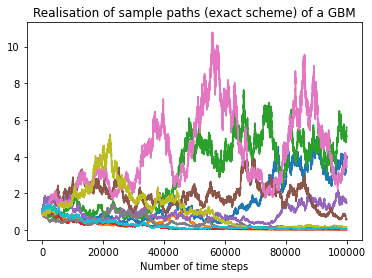

In [7]:
P = 10  # number of sample paths

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
for _ in range(P):
    path = generate_gbm_exact(rng, s0=1, mu=0, sigma=0.2, T=100, numberofsteps=100000)
    ax.plot(path)
    ax.set_xlabel("Number of time steps")
    ax.set_title("Realisation of sample paths (exact scheme) of a GBM")
plt.show()

2. First order Euler scheme for generating sample paths of a geometric Brownian motion:

In [8]:
def generate_gbm_euler(rng, s0, mu, sigma, T, numberofsteps):
    samplepath = np.zeros(numberofsteps+1)
    h = T / numberofsteps
    mynormals = rng.standard_normal(size=numberofsteps)
    samplepath[0] = s0
    for i in range(0, numberofsteps):
        samplepath[i+1] = samplepath[i] * (1 + mu * h + sigma * np.sqrt(h) * mynormals[i])
    return samplepath

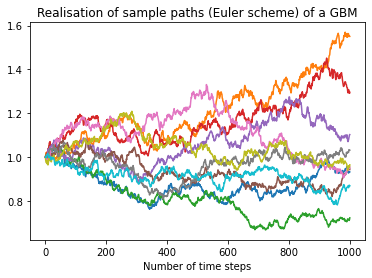

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for _ in range(P):
    path = generate_gbm_euler(rng, s0=1, mu=0, sigma=0.2, T=1, numberofsteps=1000)
    ax.plot(path)
    ax.set_xlabel("Number of time steps")
    ax.set_title("Realisation of sample paths (Euler scheme) of a GBM")
plt.show()

### Exercise 3 
Consider the following example of an Asian option which has payoff
\begin{align*}
	( \frac{1}{m}\sum_{j=1}^{m} S_{t_j} - K)^+, 
\end{align*}
where $0 = t_0 < t_1 < \ldots < t_m=T$ is a fixed set of dates, $T$ is the maturity of the option, $K$ is the strike price.
We consider the Black-Scholes model with time-$t$ stock price  
\begin{align*}
	S_t = S_0 \exp \left( (r - \frac{\sigma^2}{2}) t + \sigma W_t \right)
\end{align*}
and riskless asset with time-$t$ price $B_t = e^{rt}$. 
The time-0 price of the Asian option is given by (expectation is taken under the risk-neutral probability measure)
\begin{align*}   
	I=\mathbb{E}[e^{-rT}( \frac{1}{m}\sum_{j=1}^{m} S_{t_j} - K)^+].  
\end{align*}
We can compute the price of this option using a Monte Carlo estimator
\begin{align*}
	\hat{I} = \frac{1}{n} \sum_{i=1}^n Y_i, 
\end{align*}
where $Y_i$ are i.i.d. with the same distribution as the random variable $$Y=e^{-rT}( \frac{1}{m}\sum_{j=1}^{m} S_{t_j} - K)^+.$$ 
(As usual $r \geq 0$ is the interest rate, $\sigma>0$ the volatility and $(W_t)$ is a Brownian motion under the risk-neutral probability measure.)

1. Write Python code that approximates the time-0 price of this Asian option using a Monte Carlo estimator together with an asymptotic 95 \% confidence interval. (You can assume that the time grid is given by $t_n=n h$ for some $h>0$ and $n \in \{0, 1, \ldots, m\}$.)
2. Find a special choice of parameters of this Asian option for which you can compute the time-0 price analytically. Use this special case to check your code, by comparing your Monte Carlo approximation to the analytical solution using Python code.  

3. **Extra challenge:** Can you write a more efficient implementation without looping over the sample size or the  time index?
### Exercise 3 - Solutions 

Here, we will use the same grid that is used to define the payoff of the option to simulate a sample path of the GBM using an exact scheme. 

In [10]:
def bs_asianoption1_mc(rng, s0, k, T, r, sigma, m, samplesize, myepsilon):
    discountedpayoffs = np.zeros(samplesize)
    for i in range(samplesize):
        # Generate samplepath.
        numberofsteps = m
        mypath = generate_gbm_exact(rng, s0, r, sigma, T, numberofsteps)
        # Compute payoff.
        averagestock = np.mean(mypath[1:])
        payoff = np.maximum(averagestock - k, 0)
        # Discount payoffs
        discountedpayoffs[i] = np.exp(- r * T)*payoff
    # Compute MC price
    price = np.mean(discountedpayoffs)
    # Compute confidence interval next
    standarddev_rv = np.std(discountedpayoffs, ddof=1)
    standarddev_mcest = standarddev_rv / np.sqrt(samplesize)
    aepsilon = norm.ppf(1.0 - myepsilon * 0.5)
    # Left boundary of CI
    ci_left = price - aepsilon * standarddev_mcest
    # Right boundary of CI
    ci_right = price + aepsilon * standarddev_mcest
    return price, standarddev_mcest, ci_left, ci_right

Note that for $m=1$ the Asian option above coincides with the European call option. The following example confirms this. 

In [11]:
def black_scholes_call(st, t, k, T, r, sigma):
    d1 = (np.log(st / k) + (r + 0.5 * sigma**2) * (T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    tmp1 = st * norm.cdf(d1, loc=0, scale=1)
    tmp2 = k * np.exp(-r *(T-t)) * norm.cdf(d2, loc=0, scale=1)
    price = tmp1 - tmp2
    return price

In [12]:
s0 = 1
sigma = 0.2
t=0
T = 1
m = 1
samplesize = 100000
myepsilon = 0.05
k = 1
r = 0
mydig = 5

myprice =  black_scholes_call(s0, t, k, T, r, sigma)
print("Analytical BS price: ", round(myprice, mydig))
print("----------------")
MCresults = bs_asianoption1_mc(rng, s0, k, T, r, sigma, m, samplesize, myepsilon)
print("MC price of Asian option: ", round(MCresults[0], mydig), ", stdev of MC est: ", 
      round(MCresults[1], mydig))
print("The corresponding CI is: (", round(MCresults[2], mydig), ", " ,  round(MCresults[3], mydig), ").")

Analytical BS price:  0.07966
----------------
MC price of Asian option:  0.07888 , stdev of MC est:  0.00041
The corresponding CI is: ( 0.07807 ,  0.0797 ).


Next, we consider a more interesting example in which $m > 1$. 

In [13]:
s0 = 1
sigma = 0.2
T = 1
m = 100
samplesize = 100000
myepsilon = 0.05
k = 1
r = 0
mydig = 5

start = time.time()

MCresults = bs_asianoption1_mc(rng, s0, k, T, r, sigma, m, samplesize, myepsilon)
runtime = time.time()-start

print("MC price of Asian option: ", round(MCresults[0], mydig), ", stdev of MC est: ", 
      round(MCresults[1], mydig))
print("The corresponding CI is: (", round(MCresults[2], mydig), ", " ,  round(MCresults[3], mydig), ").")
print("The runtime is: ", round(runtime, mydig))


MC price of Asian option:  0.0462 , stdev of MC est:  0.00023
The corresponding CI is: ( 0.04574 ,  0.04665 ).
The runtime is:  6.4162


The following code computes Asian option price without looping over samplesize or time index.

In [14]:
def generate_gbm_exact_batch(rng, s0, mu, sigma, T, samplesize, numberofsteps):
    h = T / numberofsteps
    # Generate Brownian motion increments for all samples
    mynormals = rng.standard_normal(size=(samplesize,numberofsteps))
    # Generate Brownian paths for all samples
    rv = np.cumsum(mynormals, axis=1)
    timepoints = np.arange(1, numberofsteps+1) * h
    tmp1 = (mu - 0.5 * sigma ** 2) * timepoints
    tmp2 = np.sqrt(h) * sigma * rv
    samplepath = s0 * np.exp(np.tile(tmp1,  reps=(samplesize,1)) + tmp2)
    # Set initial value to be s0 for all samples
    samplepath = np.insert(samplepath, 0, s0 ,axis=1)
    
    return samplepath

In [15]:
def bs_asianoption1_mc_batch(rng, s0, k, T, r, sigma, m, samplesize, myepsilon):
    # Generate samplepath.
    numberofsteps = m
    mypath = generate_gbm_exact_batch(rng, s0, r, sigma, T, samplesize, numberofsteps)
    # Compute payoff.
    averagestock = np.mean(mypath[:,1:],axis=1)
    payoff = np.maximum(averagestock - k, 0)
    # Discount payoffs
    discountedpayoffs = np.exp(- r * T)*payoff
    # Compute MC price
    price = np.mean(discountedpayoffs)
    # Compute confidence interval next
    standarddev_rv = np.std(discountedpayoffs, ddof=1)
    standarddev_mcest = standarddev_rv / np.sqrt(samplesize)
    aepsilon = norm.ppf(1.0 - myepsilon * 0.5)
    # Left boundary of CI
    ci_left = price - aepsilon * standarddev_mcest
    # Right boundary of CI
    ci_right = price + aepsilon * standarddev_mcest
    return price, standarddev_mcest, ci_left, ci_right

In [16]:
s0 = 1
sigma = 0.2
T = 1
m = 100
samplesize = 100000
myepsilon = 0.05
k = 1
r = 0
mydig = 5



start = time.time()

MCresults_vec = bs_asianoption1_mc_batch(rng, s0, k, T, r, sigma, m, samplesize, myepsilon)

runtime = time.time()-start


print("MC price of Asian option: ", round(MCresults_vec[0], mydig), ", stdev of MC est: ", 
      round(MCresults_vec[1], mydig))
print("The corresponding CI is: (", round(MCresults_vec[2], mydig), ", " ,  round(MCresults_vec[3], mydig), ").")
print("The runtime is: ", round(runtime, mydig))

MC price of Asian option:  0.04644 , stdev of MC est:  0.00023
The corresponding CI is: ( 0.04598 ,  0.0469 ).
The runtime is:  0.56601


Hence we see vectorization significantly reduces the runtime, especially for large sample size.


### Exercise 4 - Solutions 


1. Write Python code for generating sample paths of a two-dimensional correlated Brownian motions $(X,Y)$ with drift: 
\begin{align*}
X_t &= X_0 + \mu_1 t + \sigma_1 W_t,
\quad
Y_t = Y_0 + \mu_2 t + \sigma_2 \hat{W}_t,
\end{align*}
where $W$ and $\hat{W}$ are two standard Brownian motions with correlation $\rho\in [0,1]$ (i.e., $\mathrm{Cov}(\mathrm{d} W_t, \mathrm{d}\hat{W}_t)=\rho \mathrm{d} t$), and other coefficients are constants.  

**Hint:**  Convince yourself that $(W,\hat{W})$ can be sampled by first simulating two independent standard Brownian motions $(W,B)$, and then defining $\hat{W}=\rho W+\sqrt{1-\rho^2} B$.

In [17]:
def generate_2d_bm_exact_vec(rng, x0,y0, mu1,mu2, sigma1, sigma2, rho, T, samplesize,numberofsteps):
    h = T / numberofsteps
    mynormals = rng.standard_normal(size=(2*samplesize,numberofsteps))

    
    # Generate Brownian motion paths without looping in time
    rv_W = np.cumsum(mynormals[0:samplesize,:],axis=1)
    rv_B = np.cumsum(mynormals[samplesize:,:],axis=1)
    timepoints = np.arange(1, numberofsteps+1) * h
    samplepath_X = x0 + mu1 * np.tile(timepoints,  reps=(samplesize,1)) + np.sqrt(h) * sigma1 * rv_W
    samplepath_Y = y0 + mu2 * np.tile(timepoints,  reps=(samplesize,1)) + np.sqrt(h) * sigma2 * (rho* rv_W +np.sqrt(1-rho**2) *rv_B)

    samplepath_X = np.insert(samplepath_X, 0, x0, axis=1)
    samplepath_Y = np.insert(samplepath_Y, 0, y0, axis=1)
    return samplepath_X, samplepath_Y

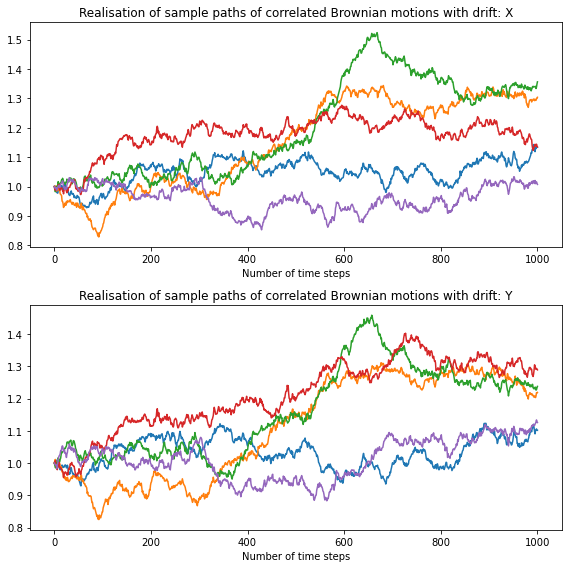

In [18]:
x0=1
y0=1
mu1=0.1
mu2=0.1
sigma1= 0.2
sigma2= 0.2
rho = 0.8
T= 1

samplesize =5
numberofsteps=1000

path = generate_2d_bm_exact_vec(rng, x0,y0, mu1,mu2, sigma1, sigma2, rho,  T, samplesize ,numberofsteps )

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax1.plot(path[0].T)
ax1.set_xlabel("Number of time steps")
ax1.set_title("Realisation of sample paths of correlated Brownian motions with drift: X")

ax2.plot(path[1].T)
ax2.set_xlabel("Number of time steps")
ax2.set_title("Realisation of sample paths of correlated Brownian motions with drift: Y")

fig.tight_layout()
plt.show()